In [2]:
import tensorflow as tf
import numpy as np
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

In [3]:
cpus = tf.config.experimental.list_physical_devices('CPU')
tf.config.experimental.set_visible_devices(devices=cpus[0],device_type='CPU')

In [10]:
train_path_to_file = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    cache_subdir='cats_and_dogs_filtered',
    origin='http://aimaksen.bslience.cn/cats_and_dogs_filtered.zip',
    extract=True
)

68616192/68606236 [==============================] - 5s 0us/step


In [11]:
train_path_to_file

'/home/stu_18510310195/.keras/cats_and_dogs_filtered/cats_and_dogs_filtered.zip'

In [13]:
!ls /home/stu_18510310195/.keras/cats_and_dogs_filtered/cats_and_dogs_filtered

train  validation  vectorize.py


In [14]:
train_dir = Path(train_path_to_file).parent / "cats_and_dogs_filtered" / 'train'
val_dir = Path(train_path_to_file).parent / "cats_and_dogs_filtered" / 'validation'

In [17]:
train_cats_dir = train_dir / "cats"
train_dogs_dir = train_dir / "dogs"
val_cats_dir = val_dir / "cats"
val_dogs_dir = val_dir / "dogs"
train_cats_dir.exists()

True

In [20]:
len(os.listdir(train_cats_dir))
len(os.listdir(train_dogs_dir))
len(os.listdir(val_cats_dir))
len(os.listdir(val_dogs_dir))

500

In [21]:
nrow = 4
ncol = 4


In [22]:
import PIL

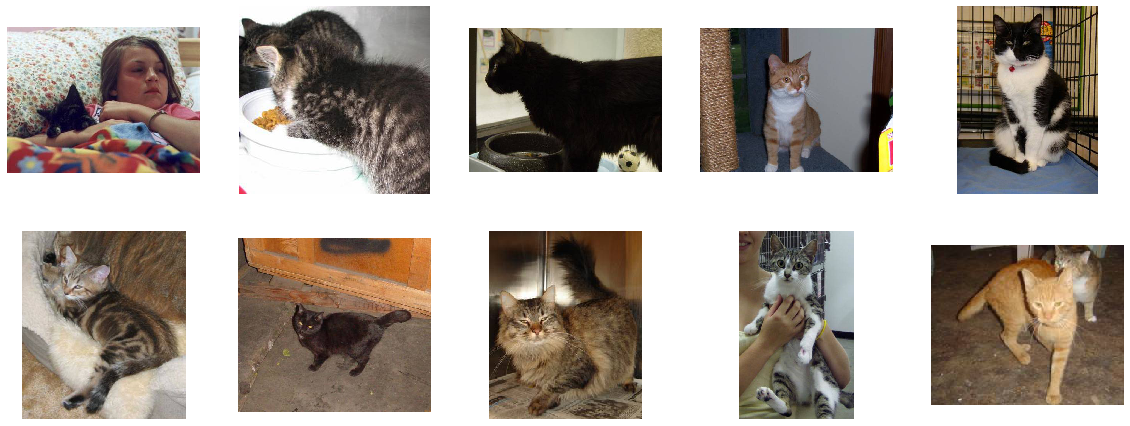

In [26]:
filepath = train_cats_dir
fig = plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    pic = PIL.Image.open(filepath/os.listdir(filepath)[i])
    plt.imshow(pic)
    plt.axis('off')

In [29]:
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [32]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3, 3), activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 64)      

In [34]:
from tensorflow.keras.optimizers import RMSprop

In [35]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
data_gen = ImageDataGenerator(rescale=1/255.0)

In [42]:
train_genetrator = data_gen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224,224)
)
val_genetrator = data_gen.flow_from_directory(
    val_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224,224)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
%load_ext tensorboard

In [44]:
from datetime import datetime

In [55]:
logdir = f'logs/fit/{datetime.now().strftime("%Y%m%d_%H%M%S")}_baseline'
logdir

'logs/fit/20211214_123851_baseline'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
history = model.fit(train_genetrator, 
                    validation_data=val_genetrator, 
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=10,
                    verbose=1,
                    callbacks=[tensorboard_callback]
                   )

Epoch 1/15
100/100 [==============================] - 20s 191ms/step - loss: 0.8793 - accuracy: 0.5515 - val_loss: 0.6890 - val_accuracy: 0.5850
Epoch 2/15
100/100 [==============================] - 19s 189ms/step - loss: 0.6675 - accuracy: 0.6310 - val_loss: 0.6329 - val_accuracy: 0.6550
Epoch 3/15
100/100 [==============================] - 19s 190ms/step - loss: 0.6019 - accuracy: 0.6990 - val_loss: 0.5514 - val_accuracy: 0.7050
Epoch 4/15
100/100 [==============================] - 19s 191ms/step - loss: 0.4947 - accuracy: 0.7705 - val_loss: 0.7958 - val_accuracy: 0.6450
Epoch 5/15
100/100 [==============================] - 19s 187ms/step - loss: 0.3769 - accuracy: 0.8245 - val_loss: 0.6937 - val_accuracy: 0.7200
Epoch 6/15
100/100 [==============================] - 19s 188ms/step - loss: 0.2928 - accuracy: 0.8765 - val_loss: 1.3520 - val_accuracy: 0.6000
Epoch 7/15
100/100 [==============================] - 19s 194ms/step - loss: 0.2065 - accuracy: 0.9220 - val_loss: 0.9570 - val_ac

In [58]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu',input_shape=(224,224,3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
#     Conv2D(512, (3, 3), activation='relu'),
#     Conv2D(512, (3, 3), activation='relu'),
#     Conv2D(512, (3, 3), activation='relu'),
#     MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [50]:
Conv2D?

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 64)       0         
 g2D)                                                 

In [60]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [61]:
logdir2 = f'logs/fit/{datetime.now().strftime("%Y%m%d_%H%M%S")}_vgg-v1'
logdir2

'logs/fit/20211214_124138_vgg-v1'

In [62]:
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=logdir2)

In [63]:
history = model.fit(train_genetrator, 
                    validation_data=val_genetrator, 
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=10,
                    verbose=1,
                    callbacks=[tensorboard_callback2]
                   )

Epoch 1/15
100/100 [==============================] - 111s 1s/step - loss: 3.9004 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.4900
Epoch 2/15
100/100 [==============================] - 110s 1s/step - loss: 0.7139 - accuracy: 0.5160 - val_loss: 0.6934 - val_accuracy: 0.4850
Epoch 3/15
100/100 [==============================] - 109s 1s/step - loss: 0.6934 - accuracy: 0.4860 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 4/15
100/100 [==============================] - 108s 1s/step - loss: 0.6933 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.4900
Epoch 5/15
100/100 [==============================] - 109s 1s/step - loss: 0.7392 - accuracy: 0.5185 - val_loss: 0.6938 - val_accuracy: 0.4600
Epoch 6/15
100/100 [==============================] - 108s 1s/step - loss: 0.7011 - accuracy: 0.5185 - val_loss: 0.6929 - val_accuracy: 0.4700
Epoch 7/15
100/100 [==============================] - 110s 1s/step - loss: 0.8409 - accuracy: 0.5095 - val_loss: 0.6846 - val_accuracy: 0.5750